<h2 id="40-係り受け解析結果の読み込み形態素">40. 係り受け解析結果の読み込み（形態素）</h2>
<p>形態素を表すクラス<code class="language-plaintext highlighter-rouge">Morph</code>を実装せよ．このクラスは表層形（<code class="language-plaintext highlighter-rouge">surface</code>），基本形（<code class="language-plaintext highlighter-rouge">base</code>），品詞（<code class="language-plaintext highlighter-rouge">pos</code>），品詞細分類1（<code class="language-plaintext highlighter-rouge">pos1</code>）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文を<code class="language-plaintext highlighter-rouge">Morph</code>オブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．</p>


In [2]:
!unzip -y data/ai.ja.zip

UnZip 6.00 of 20 April 2009, by Info-ZIP.  Maintained by C. Spieler.  Send
bug reports using http://www.info-zip.org/zip-bug.html; see README for details.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files

In [3]:
# 最初の10行表示
!cat data/ai.ja.txt | head

人工知能

人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。

『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム。応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある。1956年にダートマス会議でジョン・マッカーシーにより命名された。現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている。家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある。

プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている。人工的な知能の実現へのアプローチとしては、「ファジィ理論」や「ニューラルネットワーク」などのようなアプローチも知られているが、従来の人工知能である (Good Old Fashioned AI) との差は記述の記号的明示性にある。その後「サポートベクターマシン」が注目を集めた。また、自らの経験を元に学習を行う強化学習という手法もある。「この宇宙において、知性とは最も強力な形質である（レイ・カーツワイル）」という言葉通り、知性を機械的に表現し実装するということは極めて重要な作業である。

2006年のディープラーニング（深層学習）の登場と2010年代以降のビッグデータの登場により、一過性の流行を超えて社会に浸透して行った。2016年から2017年にかけて、ディープラーニングを導入したAI

In [4]:
# 行数
!wc -l data/ai.ja.txt

     155 data/ai.ja.txt


形態素解析 CaboCha

In [5]:
!echo ゼルダの伝説の新作が楽しみで今日も明日も眠れない | cabocha


ゼルダの-D          
    伝説の-D        
      新作が-------D
      楽しみで-----D
          今日も-D |
            明日も-D
            眠れない
EOS


In [6]:
# f1オプションで処理しやすい形に整えてくれる
!echo ゼルダの伝説の新作が楽しみで今日も明日も眠れない | cabocha -f1

* 0 1D 0/1 0.982310
ゼルダ	名詞,一般,*,*,*,*,*
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 1 2D 0/1 1.901208
伝説	名詞,一般,*,*,*,*,伝説,デンセツ,デンセツ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 2 6D 0/1 -1.480740
新作	名詞,サ変接続,*,*,*,*,新作,シンサク,シンサク
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
* 3 6D 0/1 -1.480740
楽しみ	名詞,一般,*,*,*,*,楽しみ,タノシミ,タノシミ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
* 4 5D 0/1 0.789261
今日	名詞,副詞可能,*,*,*,*,今日,キョウ,キョー
も	助詞,係助詞,*,*,*,*,も,モ,モ
* 5 6D 0/1 -1.480740
明日	名詞,副詞可能,*,*,*,*,明日,アシタ,アシタ
も	助詞,係助詞,*,*,*,*,も,モ,モ
* 6 -1D 0/1 0.000000
眠れ	動詞,自立,*,*,一段,未然形,眠れる,ネムレ,ネムレ
ない	助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
EOS


CaboChaは文ごとに分かれていることが前提となっているので、ai.ja.txtを文毎に分けて、ai.ja.sentence.txtに保存する

In [7]:
with (open('data/ai.ja.txt') as fr,
      open('work/ai.ja.sentence.txt', 'w') as fw):
    for line in fr:
        if line == '\n': continue
        line = line.rstrip()
        # １行に複数文ある場合もあるので句点で分ける
        lines = line.split('。')
        # 文末に改行をくっつける
        add_sentence = '\n'.join(lines)
        fw.write(add_sentence)
        # 読点で終わっていない文にも改行を付ける
        if add_sentence[-1] != '\n':
            fw.write('\n')

!cat work/ai.ja.sentence.txt | head

人工知能
人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語
「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる
『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム
応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある
1956年にダートマス会議でジョン・マッカーシーにより命名された
現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている
家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある
プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている


文毎に分けたai.ja.sencence.txtから、CaboChaで形態素解析をしてai.ja.txt.cabochaに保存する

In [8]:
!cat work/ai.ja.sentence.txt | cabocha -f1 > work/ai.ja.txt.cabocha

In [9]:
# デコレータを使うバージョン
from pydantic.dataclasses import dataclass
import re
repattern = re.compile('[\t,]')
# クラスを実装
@dataclass
class MorphDeco:
    # メンバ変数を定義
    surface: str
    base: str
    pos: str
    pos1: str

    # 1文を受け取ってsurfase, base, pos, pos1を取り出してmorphインスタンスにする関数
    @classmethod
    def sentence2morph(cls, sentence):
        surfase, pos, pos1, *rest = repattern.split(sentence)
        base = rest[4]
        morph = cls(surfase, base, pos, pos1)
        return morph

morph_onesentence_list = [] # 1文毎のmorphのリスト
is_one_sentence = False # 文が続いているかどうか
with open('work/ai.ja.txt.cabocha') as f:
    for line in f:
        line = line.rstrip()
        # *から始まる行はスルー
        if line[0] == '*': continue
        # EOSが来たら新しい文が次に来るはず
        if line == 'EOS':
            is_one_sentence = False
            continue
        morph = MorphDeco.sentence2morph(line)
        # 文中なら末尾のリストに突っ込む
        if is_one_sentence:
            morph_onesentence_list[-1].append(morph)
        # 新しい文なら新しいリストを作って文中に入る
        else:
            morph_onesentence_list.append([morph])
            is_one_sentence = True
# 表示
from pprint import pprint
pprint(morph_onesentence_list[1])

[MorphDeco(surface='人工', base='人工', pos='名詞', pos1='一般'),
 MorphDeco(surface='知能', base='知能', pos='名詞', pos1='一般'),
 MorphDeco(surface='（', base='（', pos='記号', pos1='括弧開'),
 MorphDeco(surface='じん', base='じん', pos='名詞', pos1='一般'),
 MorphDeco(surface='こうち', base='こうち', pos='名詞', pos1='一般'),
 MorphDeco(surface='のう', base='のう', pos='助詞', pos1='終助詞'),
 MorphDeco(surface='、', base='、', pos='記号', pos1='読点'),
 MorphDeco(surface='、', base='、', pos='記号', pos1='読点'),
 MorphDeco(surface='AI', base='*', pos='名詞', pos1='一般'),
 MorphDeco(surface='〈', base='〈', pos='記号', pos1='括弧開'),
 MorphDeco(surface='エーアイ', base='*', pos='名詞', pos1='固有名詞'),
 MorphDeco(surface='〉', base='〉', pos='記号', pos1='括弧閉'),
 MorphDeco(surface='）', base='）', pos='記号', pos1='括弧閉'),
 MorphDeco(surface='と', base='と', pos='助詞', pos1='格助詞'),
 MorphDeco(surface='は', base='は', pos='助詞', pos1='係助詞'),
 MorphDeco(surface='、', base='、', pos='記号', pos1='読点'),
 MorphDeco(surface='「', base='「', pos='記号', pos1='括弧開'),
 MorphDeco(surface='『'

In [10]:
# 別解
# デコレータを使わないバージョン
import re
repattern = re.compile('[\t,]')
# クラスを実装
class Morph:
    # メンバ変数を定義
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    # インスタンスの出力を可視化
    def __str__(self) -> str:
        return f'Morph(surface:{self.surface}, base:{self.base}, pos:{self.pos}, pos1:{self.pos1})'

# 1文を受け取ってsurfase, base, pos, pos1を取り出してmorphインスタンスにする関数
def sentence2morph(sentence):
    surfase, pos, pos1, *rest = repattern.split(sentence)
    base = rest[4]
    morph = Morph(surfase, base, pos, pos1)
    return morph

In [11]:
morph_onesentence_list = [] # 1文毎のmorphのリスト
is_one_sentence = False # 文が続いているかどうか
with open('work/ai.ja.txt.cabocha') as f:
    for line in f:
        line = line.rstrip()
        # *から始まる行はスルー
        if line[0] == '*': continue
        # EOSが来たら新しい文が次に来るはず
        if line == 'EOS':
            is_one_sentence = False
            continue
        # morph = Morph.sentence2morph(line)
        morph = sentence2morph(line)
        # 文中なら末尾のリストに突っ込む
        if is_one_sentence:
            morph_onesentence_list[-1].append(morph)
        # 新しい文なら新しいリストを作って文中に入る
        else:
            morph_onesentence_list.append([morph])
            is_one_sentence = True

# 表示
# pprintとかリストのインスタンスの出力だと__str__を通ってくれないっぽい
for m in morph_onesentence_list[1]:
    print(m)

Morph(surface:人工, base:人工, pos:名詞, pos1:一般)
Morph(surface:知能, base:知能, pos:名詞, pos1:一般)
Morph(surface:（, base:（, pos:記号, pos1:括弧開)
Morph(surface:じん, base:じん, pos:名詞, pos1:一般)
Morph(surface:こうち, base:こうち, pos:名詞, pos1:一般)
Morph(surface:のう, base:のう, pos:助詞, pos1:終助詞)
Morph(surface:、, base:、, pos:記号, pos1:読点)
Morph(surface:、, base:、, pos:記号, pos1:読点)
Morph(surface:AI, base:*, pos:名詞, pos1:一般)
Morph(surface:〈, base:〈, pos:記号, pos1:括弧開)
Morph(surface:エーアイ, base:*, pos:名詞, pos1:固有名詞)
Morph(surface:〉, base:〉, pos:記号, pos1:括弧閉)
Morph(surface:）, base:）, pos:記号, pos1:括弧閉)
Morph(surface:と, base:と, pos:助詞, pos1:格助詞)
Morph(surface:は, base:は, pos:助詞, pos1:係助詞)
Morph(surface:、, base:、, pos:記号, pos1:読点)
Morph(surface:「, base:「, pos:記号, pos1:括弧開)
Morph(surface:『, base:『, pos:記号, pos1:括弧開)
Morph(surface:計算, base:計算, pos:名詞, pos1:サ変接続)
Morph(surface:（, base:（, pos:記号, pos1:括弧開)
Morph(surface:）, base:）, pos:記号, pos1:括弧閉)
Morph(surface:』, base:』, pos:記号, pos1:括弧閉)
Morph(surface:という, base:という, pos:助詞, pos1:

    assert文
assert 条件文, 文字列

で条件文がTrueのときにエラーを発生させて文字列を表示する

デバッグに有用

    代入文 :=

    startswith, endswith
文字列の最初と最後を確認する

<h2 id="41-係り受け解析結果の読み込み文節係り受け">41. 係り受け解析結果の読み込み（文節・係り受け）</h2>
<p>40に加えて，文節を表すクラス<code class="language-plaintext highlighter-rouge">Chunk</code>を実装せよ．このクラスは形態素（<code class="language-plaintext highlighter-rouge">Morph</code>オブジェクト）のリスト（<code class="language-plaintext highlighter-rouge">morphs</code>），係り先文節インデックス番号（<code class="language-plaintext highlighter-rouge">dst</code>），係り元文節インデックス番号のリスト（<code class="language-plaintext highlighter-rouge">srcs</code>）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文を<code class="language-plaintext highlighter-rouge">Chunk</code>オブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．</p>


In [12]:
# デコレータを使うバージョン
from pydantic.dataclasses import dataclass
from dataclasses import field

@dataclass
class ChunkDeco():
    index: int # 何文節めか
    dst: int # 係り先番号
    morphs: list[MorphDeco] = field(default_factory=list)
    # morphs: list[Morph] = []
    srcs: list[int] = field(default_factory=list) # 係り元番号のリスト
    
    # 文をチャンクにする
    @classmethod
    def sentence2chunk(cls, sentence):
        _, index, dst, bunsu, num = sentence.split(' ')
        dst = dst.rstrip('D')
        chunk = cls(index, dst)
        return chunk
    
    # 係り元を探してsrcsに代入する
    def find_dependency(chunks):
        for chunk in chunks:
            chunks[chunk.dst].srcs.append(chunk.index)
        return chunks

# Morphを継承して関数を追加
class MorphDeco(MorphDeco):
    # morphsを1つの文節にする
    def morphs2phrase(morphs):
        phrase = ''
        for morph in morphs:
            phrase += morph.surface
        return phrase

# チャンクの集まり（文ごと）のリストを作る
# 問題42で再度使う必要があると思ったから関数にしたけど使わなかったので関数にした意味ないかも
def make_chunks_list():
    # 文節をchunkにして、1文をchunkのリストにする
    chunks_list = [] 
    with open('work/ai.ja.txt.cabocha') as f:
        chunks = [] # 1文のチャンクをまとめたリスト
        for line in f:
            line = line.rstrip()
            # 文末を表す
            if line == 'EOS':
                # かかり元をsrcsを代入する
                chunks = ChunkDeco.find_dependency(chunks)
                chunks_list.append(chunks)
                chunks = [] # 初期化
                continue
            
            # 「*」から始まる文のみ取り出す
            if line[0] == '*': 
                chunk = ChunkDeco.sentence2chunk(line)
                chunks.append(chunk)
            # cabochaで書かれた形態素解析を、文節ごとにmorphsに突っ込む
            else:
                chunk.morphs.append(MorphDeco.sentence2morph(line))            
    return chunks_list

chunks_list = make_chunks_list()

# 1つめのChunkリストの表示
from pprint import pprint
pprint(chunks_list[1])
# 1つ目の文について、文節ごとの表示をする
for cl in chunks_list[1]:
    # どこからも係っていない文節はスルー
    if cl.dst == -1: continue
    # もとの文節
    phrase = MorphDeco.morphs2phrase(cl.morphs)
    # 係り先の語
    dependency_phrase = MorphDeco.morphs2phrase(chunks_list[1][cl.dst].morphs)
    print(f'{phrase} -> {dependency_phrase}')

[ChunkDeco(index=0, dst=17, morphs=[MorphDeco(surface='人工', base='人工', pos='名詞', pos1='一般'), MorphDeco(surface='知能', base='知能', pos='名詞', pos1='一般')], srcs=[]),
 ChunkDeco(index=1, dst=17, morphs=[MorphDeco(surface='（', base='（', pos='記号', pos1='括弧開'), MorphDeco(surface='じん', base='じん', pos='名詞', pos1='一般'), MorphDeco(surface='こうち', base='こうち', pos='名詞', pos1='一般'), MorphDeco(surface='のう', base='のう', pos='助詞', pos1='終助詞'), MorphDeco(surface='、', base='、', pos='記号', pos1='読点'), MorphDeco(surface='、', base='、', pos='記号', pos1='読点')], srcs=[]),
 ChunkDeco(index=2, dst=3, morphs=[MorphDeco(surface='AI', base='*', pos='名詞', pos1='一般')], srcs=[]),
 ChunkDeco(index=3, dst=17, morphs=[MorphDeco(surface='〈', base='〈', pos='記号', pos1='括弧開'), MorphDeco(surface='エーアイ', base='*', pos='名詞', pos1='固有名詞'), MorphDeco(surface='〉', base='〉', pos='記号', pos1='括弧閉'), MorphDeco(surface='）', base='）', pos='記号', pos1='括弧閉'), MorphDeco(surface='と', base='と', pos='助詞', pos1='格助詞'), MorphDeco(surface='は', base='は

In [13]:
# 別解
# デコレータを使わないバージョン
class Chunk():
    def __init__(self, index, dst):
        self.index = index
        self.dst = dst
        self.morphs = []
        self.srcs = []
    # インスタンスの出力を可視化
    def __str__(self) -> str:
        return f'Chunk(index:{self.index}, dst:{self.dst}, morphs:{self.morphs}, srcs:{self.srcs})'

def sentence2chunk(sentence):
    _, index, dst, bunsu, num = sentence.split(' ')
    index = int(index)
    dst = int(dst.rstrip('D'))
    chunk = Chunk(index, dst)
    return chunk    

def find_dependency(chunks):
    for chunk in chunks:
        chunks[chunk.dst].srcs.append(chunk.index)
    return chunks

# morphsを1つの文節にする
def morphs2phrase(morphs):
    phrase = ''
    for morph in morphs:
        phrase += morph.surface
    return phrase

def make_chunks_list():
    # 文節をchunkにして、1文をchunkのリストにする
    chunks_list = [] 
    with open('work/ai.ja.txt.cabocha') as f:
        chunks = []  # 1文のチャンクをまとめたリスト
        for line in f:
            line = line.rstrip()
            # 文末を表す
            if line == 'EOS':
                # かかり元をsrcsを代入する
                chunks = find_dependency(chunks)
                chunks_list.append(chunks)
                chunks = []  # 初期化
                continue
            
            # 「*」から始まる文のみ取り出す
            if line[0] == '*': 
                chunk = sentence2chunk(line)
                chunks.append(chunk)
            # cabochaで書かれた形態素解析を、文節ごとにmorphsに突っ込む
            else:
                chunk.morphs.append(sentence2morph(line))            
    return chunks_list

chunks_list = make_chunks_list()

# 1つめのChunkリストの表示
for c in chunks_list[1]:
    print(c)

# 1つ目の文について、文節ごとの表示をする
for cl in chunks_list[1]:
    # どこからも係っていない文節はスルー
    if cl.dst == -1: continue
    # もとの文節
    phrase = morphs2phrase(cl.morphs)
    # 係り先の語
    dependency_phrase = morphs2phrase(chunks_list[1][cl.dst].morphs)
    print(f'{phrase} -> {dependency_phrase}')

Chunk(index:0, dst:17, morphs:[<__main__.Morph object at 0x10754cb20>, <__main__.Morph object at 0x10754cbe0>], srcs:[])
Chunk(index:1, dst:17, morphs:[<__main__.Morph object at 0x10754cc40>, <__main__.Morph object at 0x107c4c400>, <__main__.Morph object at 0x107c4c460>, <__main__.Morph object at 0x107c4c4c0>, <__main__.Morph object at 0x107c4c520>, <__main__.Morph object at 0x107c4c580>], srcs:[])
Chunk(index:2, dst:3, morphs:[<__main__.Morph object at 0x107c4c640>], srcs:[])
Chunk(index:3, dst:17, morphs:[<__main__.Morph object at 0x107c4c700>, <__main__.Morph object at 0x107c4c760>, <__main__.Morph object at 0x107c4c7c0>, <__main__.Morph object at 0x107c4c820>, <__main__.Morph object at 0x107c4c880>, <__main__.Morph object at 0x107c4c8e0>, <__main__.Morph object at 0x107c4c940>], srcs:[2])
Chunk(index:4, dst:5, morphs:[<__main__.Morph object at 0x107c4ca00>, <__main__.Morph object at 0x107c4ca60>, <__main__.Morph object at 0x107c4cac0>], srcs:[])
Chunk(index:5, dst:9, morphs:[<__mai

<h2 id="42-係り元と係り先の文節の表示">42. 係り元と係り先の文節の表示</h2>
<p>係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．</p>


In [14]:
# morphsを1つの文節にする
def morphs2phrase(morphs, is_eliminate_sign=False):
    phrase = ''
    for morph in morphs:
        # 問題42で記号を取り除くときに使う
        if is_eliminate_sign:
            if morph.pos == '記号':
                continue
        phrase += morph.surface
    return phrase

# 1つ目の文について、文節ごとの表示をする
for cl in chunks_list[1]:
    # どこからも係っていない文節はスルー
    if cl.dst == -1: continue
    # もとの文節、記号を取り除くオプション
    phrase = morphs2phrase(cl.morphs, is_eliminate_sign=True)
    # 係り先の語、記号を取り除くオプション
    dependency_phrase = morphs2phrase(chunks_list[1][cl.dst].morphs, is_eliminate_sign=True)
    # タブ区切りで出力
    print(f'{phrase}\t{dependency_phrase}')

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語


<h2 id="43-名詞を含む文節が動詞を含む文節に係るものを抽出">43. 名詞を含む文節が動詞を含む文節に係るものを抽出</h2>
<p>名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．</p>


In [15]:
def morphs2phrase(morphs, is_eliminate_sign=False):
        phrase = ''
        for morph in morphs:
            # 問題42で記号を取り除くときに使う
            if is_eliminate_sign:
                if morph.pos == '記号':
                    continue
            phrase += morph.surface
        return phrase

# 1つ目の文について、文節ごとの表示をする
for cl in chunks_list[1]:
    # どこからも係っていない文節はスルー
    if cl.dst == -1: continue
    # もとの文節のmorphsが「名詞」を含むとき
    if '名詞' in [m.pos for m in cl.morphs]:
        # かかり先の文節のmorphsが「動詞」を含むとき
        if '動詞' in [m.pos for m in chunks_list[1][cl.dst].morphs]:
            # もとの文節、記号を取り除くオプション
            phrase = morphs2phrase(cl.morphs, is_eliminate_sign=True)
            # 係り先の語、記号を取り除くオプション
            dependency_phrase = morphs2phrase(chunks_list[1][cl.dst].morphs, is_eliminate_sign=True)
            # タブ区切りで出力
            print(f'{phrase}\t{dependency_phrase}')

道具を	用いて
知能を	研究する
一分野を	指す


<h2 id="44-係り受け木の可視化">44. 係り受け木の可視化</h2>
<p>与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，<a href="http://www.graphviz.org/">Graphviz</a>等を用いるとよい．</p>


    graphvizモジュール
* グラフを描画するモジュール
* import graphviz
* g = graphviz.Digraph(format=写真の拡張子, filename=名前)：有向グラフ
  * 無向グラフはDigraphではなく、Graphにする
* g.attr('node', shape='square', style='filled')：
* g.node(label=表示文字列, name=名前)：ノード作成
  * そのまま文字列を書くこともできるが、複数の同名に対処できないので、オプション引数でlabelとnameを使い分けると良い
  * オプション引数として以下のものがある
  * shape='square'：形
  * color='green'：色
* g.edge(文字列1, 文字列2)：ノードを接続する
  * 文字列1は存在しないといけない
  * 文字列2は新しく作っても既存でも良い
  * ここで文字列はnodeのときに定義したlabelではなくname！！
  * オプション引数は以下
  * label=文字列：辺の横に表示する文字列
* g.view()：グラフを表示(勝手に保存もするみたい)
* g.render(パスと名前)：画像として保存

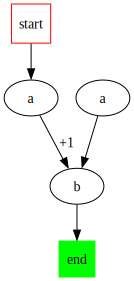

In [16]:
import graphviz
g = graphviz.Digraph(format='png', filename='test')
g.node(label='start', name='0', shape='square', color='red')
g.node(label='a', name='1')
g.node(label='a', name='2')
g.node(label='b', name='3')
g.node(label='end', name='4', shape='square', color='lime', style='filled')
g.edge('0', '1')
g.edge('1', '3', label='+1')
g.edge('2', '3')
g.edge('3', '4')
# g.view()
# g.render('test')
g

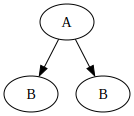

In [17]:
from graphviz import Digraph
graph = Digraph(format="png")
graph.node(name="1",label="A")
graph.node(name="2",label="B")
graph.node(name="3",label="B")
# edgeで参照するのはlabelではなく、nameのほう！
graph.edge("1", "2")
graph.edge("1", "3")
graph
# graph.view()

In [18]:
import graphviz
g = graphviz.Digraph(format='png', filename='phrase_dependency')
# 1つ目の文について、文節ごとの表示をする
for cl in chunks_list[1]:
    # どこからも係っていない文節はROOTにつなぐ
    if cl.dst == -1:
        g.edge(str(cl.index), 'ROOT')
        continue
    # もとの文節、記号を取り除くオプション
    phrase = morphs2phrase(cl.morphs, is_eliminate_sign=True)
    # 係り先の語、記号を取り除くオプション
    dependency_phrase = morphs2phrase(chunks_list[1][cl.dst].morphs, is_eliminate_sign=True)
    # 新しいノードを用意してつなぐ
    # 同名の重複に対応するために各ノードにindexで名前をつけて、名前でノードを結ぶ
    g.node(label=phrase, name=str(cl.index))
    g.node(label=dependency_phrase, name=str(chunks_list[1][cl.dst].index))
    g.edge(str(cl.index), str(chunks_list[1][cl.dst].index))
# g.view()

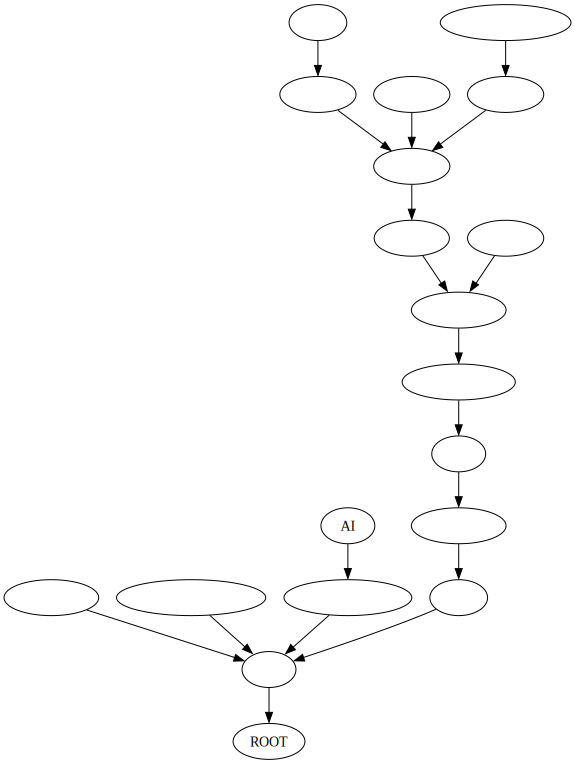

In [19]:
# 表示
g

<h2 id="45-動詞の格パターンの抽出">45. 動詞の格パターンの抽出</h2>
<p>今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい．
動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ．
ただし，出力は以下の仕様を満たすようにせよ．</p>
<ul>
<li>動詞を含む文節において，最左の動詞の基本形を述語とする</li>
<li>述語に係る助詞を格とする</li>
<li>述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる</li>
</ul>
<p>「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える．
この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>作り出す	で は を
</code></pre></div></div>
<p>このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．</p>
<ul>
<li>コーパス中で頻出する述語と格パターンの組み合わせ</li>
<li>「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）</li>
</ul>


In [21]:
# 形態素の組をを文節に復元する
def morphs2phrase(morphs, is_eliminate_sign=False):
        phrase = ''
        for morph in morphs:
            # 問題42で記号を取り除くときに使う
            if is_eliminate_sign:
                if morph.pos == '記号':
                    continue
            phrase += morph.surface
        return phrase

with open('work/corpus.txt', 'w') as fw:
    for chunks in chunks_list:
        # 1文ごとのチャンク
        for chunk in chunks:
            for morph in chunk.morphs:
                if morph.pos == '動詞':
                    # 動詞の基本形を表示
                    fw.write(f'{morph.base} ')
                    # 係り元番号を回す
                    for i in chunk.srcs:
                        # 係り元の形態素を１つずつ見て助詞のみ取り出す
                        for op_morph in chunks[i].morphs:
                            if op_morph.pos == '助詞':
                                fw.write(f'{op_morph.surface} ')
                    fw.write('\n')
                    break
# 10行表示
!cat work/corpus.txt | head

214
用いる を 
する て を 
指す を 
代わる を に 
行う て に 
する と も 
述べる で は の に て 
する を で 
する を 
する を 


In [902]:
# 多い順に並べてみた
!cat work/corpus.txt | sort | uniq -c | sort -nr | head

  50 する を 
  17 する が 
  15 する に 
  13 する と 
   9 よる に 
   8 行う を 
   8 する 
   7 する は を 
   6 基づく に 
   6 呼ぶ と 


In [903]:
# 行う、なる、与える　という動詞の格パターンをコーパス中で出現頻度の高い順に並べる
!awk '$1 == "行う" || $1 == "なる" || $1 == "与える" {print $0}' work/corpus.txt | sort | uniq -c | sort -nr | head

   8 行う を 
   4 なる は に 
   3 なる が と 
   2 なる に 
   1 行う を に を 
   1 行う まで を に 
   1 行う は を をめぐって て 
   1 行う は を て 
   1 行う は を 
   1 行う により に を 


In [904]:
# 正規表現でマッチして抜き出す
!grep -E '^(行う |なる |与える )' work/corpus.txt | sort | uniq -c | sort -rn | head

   8 行う を 
   4 なる は に 
   3 なる が と 
   2 なる に 
   1 行う を に を 
   1 行う まで を に 
   1 行う は を をめぐって て 
   1 行う は を て 
   1 行う は を 
   1 行う により に を 


<h2 id="46-動詞の格フレーム情報の抽出">46. 動詞の格フレーム情報の抽出</h2>
<p>45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．</p>
<ul>
<li>項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）</li>
<li>述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる</li>
</ul>
<p>「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える．
この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>作り出す	で は を	会議で ジョンマッカーシーは 用語を
</code></pre></div></div>


In [905]:
with open('work/corpus2.txt', 'w') as fw:
    for chunks in chunks_list:
        # 1文ごとのチャンク
        for chunk in chunks:
            for morph in chunk.morphs:
                if morph.pos == '動詞':
                    # 動詞の基本形を表示
                    fw.write(f'{morph.base} ')
                    # 係り元の文節をそのまま取り出してリストに入れる
                    # for文を２回回すのがもったいないので保存して後で表示
                    tmp_phrases = [] # here
                    # 係り元番号を回す
                    for i in chunk.srcs:
                        # 係り元の形態素を１つずつ見て助詞のみ取り出す
                        for op_morph in chunks[i].morphs:
                            if op_morph.pos == '助詞':
                                tmp_phrases.append(morphs2phrase(chunks[i].morphs))
                                fw.write(f'{op_morph.surface} ')
                    # リストの入れた係り元の文節を空白区切りで取り出す
                    fw.write(f'{" ".join(tmp_phrases)}\n') # here
                    break
# 10行表示
!cat work/corpus2.txt | head

用いる を 道具を
する て を 用いて 『知能』を
指す を 一分野」を
代わる を に 知的行動を 人間に
行う て に 代わって コンピューターに
する と も 研究分野」とも 研究分野」とも
述べる で は の に て 解説で、 佐藤理史は 次のように 次のように 述べている
する を で 知的能力を コンピュータ上で
する を 推論・判断を
する を 画像データを


<h2 id="47-機能動詞構文のマイニング">47. 機能動詞構文のマイニング</h2>
<p>動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．</p>
<ul>
<li>「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする</li>
<li>述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる</li>
<li>述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる</li>
<li>述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）</li>
</ul>
<p>例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>学習を行う	に を	元に 経験を
</code></pre></div></div>


In [22]:
with open('work/corpus3.txt', 'w') as fw:
    for chunks in chunks_list:
        # 1文ごとのチャンク
        for chunk in chunks:
            for morph in chunk.morphs:
                if morph.pos == '動詞':
                    # 係り元番号を回す
                    for srcs_i in chunk.srcs:
                        # 「サ変接続 + を」がかかるときのみ表示する
                        for morph_i, op_morph in enumerate(chunks[srcs_i].morphs):
                            if op_morph.pos1 == 'サ変接続' and chunks[srcs_i].morphs[morph_i-1].base == 'を':
                                # サ変接続 + を + 動詞
                                print(op_morph.base, end='')
                                print(chunks[srcs_i].morphs[morph_i-1].base, end='')
                                print(morph.base, end=' ')
                                
                                # 係り元の文節をそのまま取り出してリストに入れる
                                # for文を２回回すのがもったいないので保存して後で表示
                                tmp_phrases = []
                                for srcs_j in chunk.srcs:
                                    for m in chunks[srcs_j].morphs:
                                        # 自分自身は除く助詞を表示
                                        if m.pos == '助詞':
                                            # 自らを含む場合はとばす
                                            if op_morph.base in morphs2phrase(chunks[srcs_j].morphs, is_eliminate_sign=True):
                                                continue
                                            print(m.surface, end=' ')
                                            tmp_phrases.append(morphs2phrase(chunks[srcs_j].morphs, is_eliminate_sign=True))
                                    # fw.write(f'{op_morph.surface} ')
                                # リストの入れた係り元の文節を空白区切りで取り出す
                                # if tmp_phrases != []:
                                print(' '.join(tmp_phrases))
                        # fw.write(f'{" ".join(tmp_phrases)}\n') # here
                    # １個めの動詞で終わらせるためにここで抜ける
                    break
# 10行表示
# !cat work/corpus3.txt | head

推論をする 
記述をする と 主体と
注目を集める が サポートベクターマシンが
経験を行う に を 元に 学習を
学習を行う を に 経験を 元に
流行を超える 
学習を繰り返す 
統計をする で は を に を通して ACT-Rでは ACT-Rでは 推論ルールを 元に 生成規則を通して
進化を見せる は て において て 敵対的生成ネットワークは 加えて 生成技術において 見せている
開発を行う は エイダ・ラブレスは
プログラミングをする は 彼はまた
テストをする 
来談を行う 
プログラミングをする は アランカルメラウアーは
投資を上回る が コストが
意味をする から に対して ここから 非構造化データに対して
処理を行う 
意味をする に データに
研究を進める て 費やして
命令をする で 機構で
運転をする に 元に
特許をする まで に が 2018年までに 2018年までに 日本が
研究をする 
運転をする て に 基づいて 柔軟に
注目を集める から は ことから ファジィは
成功を受ける 
開発を抑える 
制御をする から 少なさから
表現をする 
進歩を担う 
専用を使う 
研究を続ける が て ジェフホーキンスが 向けて
行動を用いる は は て これは ものではなく 用いている
関連を導き出す 
認識を持つ 
注目を集める に 急速に
普及を受ける 
投資を行う に で 全世界的に 民間企業主導で
探索を行う で 無報酬で
推論をする て 経て
共同を始める とも マックスプランク研究所とも
研究を行う は て Googleは 行っている
研究をする で は で 中国では 中国では 官民一体で
実験をする 
研究をする で 日本で
投資をする は まで に 韓国は 2022年までに 2022年までに
反乱を起こす て に対して 於いて 人間に対して
弾圧を併せ持つ 
監視を行う まで に 歩行者まで 人工知能に
監視を恐れる 
監視をする 
差別を認める 
研究をする 
展開を変える 
戦争をする 
判断を介す から 観点から
開発を出す に 2012年に
禁止を求める に は が て 4月には 4月には ヒューマン・ライツ・ウォッチが 求めている
運用をめぐる 
開発を行う は をめぐって て 米国中国ロシアは 軍事利用をめぐって

<h2 id="48-名詞から根へのパスの抽出">48. 名詞から根へのパスの抽出</h2>
<p>文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ．
ただし，構文木上のパスは以下の仕様を満たすものとする．</p>
<ul>
<li>各文節は（表層形の）形態素列で表現する</li>
<li>パスの開始文節から終了文節に至るまで，各文節の表現を”<code class="language-plaintext highlighter-rouge"> -&gt; </code>“で連結する</li>
</ul>
<p>「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える．
CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>ジョンマッカーシーは -&gt; 作り出した
AIに関する -&gt; 最初の -&gt; 会議で -&gt; 作り出した
最初の -&gt; 会議で -&gt; 作り出した
会議で -&gt; 作り出した
人工知能という -&gt; 用語を -&gt; 作り出した
用語を -&gt; 作り出した
</code></pre></div></div>
<p>KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>ジョンマッカーシーは -&gt; 作り出した
ＡＩに -&gt; 関する -&gt; 会議で -&gt; 作り出した
会議で -&gt; 作り出した
人工知能と -&gt; いう -&gt; 用語を -&gt; 作り出した
用語を -&gt; 作り出した
</code></pre></div></div>


In [915]:
# 名詞からROOTまでたどって、文字列のリストを返す
def following_ROOT(chunks, chunk) -> list[str]:
    follow_list = []
    # 最初だけwhileの外で
    # 名詞を含む文節をリストのはじめに入れる
    follow_list.append(morphs2phrase(chunk.morphs, is_eliminate_sign=True))
    next_id = chunk.dst # 次の文節のID
    # ROOTまでたどり着いたら終了
    while next_id != -1:
        # 文節をリストに突っ込む
        follow_list.append(morphs2phrase(chunks[next_id].morphs, is_eliminate_sign=True))
        next_id = chunks[next_id].dst # 次の文節のID
    return follow_list

# 34行目のジョンマッカーシーの文を表示
for chunk in chunks_list[33]:
    # 名詞を含む文節を取り出す
    if '名詞' in [m.pos for m in chunk.morphs]:
        print(' -> '.join(following_ROOT(chunks_list[33], chunk)))

ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した


<h2 id="49-名詞間の係り受けパスの抽出">49. 名詞間の係り受けパスの抽出</h2>
<p>文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号が\(i\)と\(j\)（\(i &lt; j\)）のとき，係り受けパスは以下の仕様を満たすものとする．</p>
<ul>
<li>問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を”<code class="language-plaintext highlighter-rouge"> -&gt; </code>“で連結して表現する</li>
<li>文節\(i\)と\(j\)に含まれる名詞句はそれぞれ，XとYに置換する</li>
</ul>
<p>また，係り受けパスの形状は，以下の2通りが考えられる．</p>
<ul>
<li>文節\(i\)から構文木の根に至る経路上に文節\(j\)が存在する場合: 文節\(i\)から文節\(j\)のパスを表示</li>
<li>上記以外で，文節\(i\)と文節\(j\)から構文木の根に至る経路上で共通の文節\(k\)で交わる場合: 文節\(i\)から文節\(k\)に至る直前のパスと文節\(j\)から文節\(k\)に至る直前までのパス，文節\(k\)の内容を”<code class="language-plaintext highlighter-rouge"> | </code>“で連結して表示</li>
</ul>
<p>「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える．
CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>Xは | Yに関する -&gt; 最初の -&gt; 会議で | 作り出した
Xは | Yの -&gt; 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -&gt; 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -&gt; Yの
Xに関する -&gt; 最初の -&gt; Yで
Xに関する -&gt; 最初の -&gt; 会議で | Yという -&gt; 用語を | 作り出した
Xに関する -&gt; 最初の -&gt; 会議で | Yを | 作り出した
Xの -&gt; Yで
Xの -&gt; 会議で | Yという -&gt; 用語を | 作り出した
Xの -&gt; 会議で | Yを | 作り出した
Xで | Yという -&gt; 用語を | 作り出した
Xで | Yを | 作り出した
Xという -&gt; Yを
</code></pre></div></div>
<p>KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．</p>
<div class="language-plaintext highlighter-rouge"><div class="highlight"><pre class="highlight"><code>Xは | Yに -&gt; 関する -&gt; 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -&gt; いう -&gt; 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -&gt; 関する -&gt; Yで
Xに -&gt; 関する -&gt; 会議で | Yと -&gt; いう -&gt; 用語を | 作り出した。
Xに -&gt; 関する -&gt; 会議で | Yを | 作り出した。
Xで | Yと -&gt; いう -&gt; 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -&gt; いう -&gt; Yを
</code></pre></div></div>


In [931]:
# 名詞からROOTまでたどって、文字列のリストを返す
# 名詞をX, Yに置き換える
def following_ROOT_XY(chunks, chunk, x_or_y) -> list[str]:
    follow_list = []
    # 最初だけwhileの外で
    # 名詞を含む文節をリストのはじめに入れる
    # ここで名詞をX, Yに置き換える
    noun_phrase = ''
    is_first_noun = True
    for morph in chunk.morphs:
        # 最初の名詞だけX, Yに変換
        if morph.pos == '名詞' and is_first_noun:
            noun_phrase += x_or_y
            is_first_noun = False
        # ２つ目以降のつながっている名詞はスルー
        elif morph.pos == '名詞':
            continue
        elif morph.pos == '記号':
            continue
        else:
            noun_phrase += morph.surface
    follow_list.append(noun_phrase)
    next_id = chunk.dst # 次の文節のID
    # ROOTまでたどり着いたら終了
    while next_id != -1:
        # 文節をリストに突っ込む
        follow_list.append(morphs2phrase(chunks[next_id].morphs, is_eliminate_sign=True))
        next_id = chunks[next_id].dst # 次の文節のID
    return follow_list

# リストXがリストYを包含しているかを判断して、包含地点を返す
def inclusion(x_list, y_list, x_list_XY, y_list_XY) -> list:
    path_list = []
    # YをXが包含しているかどうかを確かめる
    for i, y in enumerate(y_list):
        # 包含していないので空リストを返して終了
        if y not in x_list:
            return []
    # 包含している場合は、Xを順番にたどっていって合流したら最初だけ表示
    for i, x in enumerate(x_list):
        # Xが合流していないときはリストに追加
        if x not in y_list:
            path_list.append(x_list_XY[i])
        # XとYが合流したらYの最初を追加して終了
        else:
            path_list.append(y_list_XY[0])
            return path_list
        
# リストXとリストYが途中で合流するかどうかを判断する関数
# （Xの独立しているパス、Yの独立しているパス、合流した単語）を返す
def confluence(x_list, y_list, x_list_XY, y_list_XY):
    path_x = [] # Xの独立しているパス
    path_y = [] # Yの独立しているパス
    union = ''  # 合流地点の語
    for x in x_list:
        # Xの要素がYに入っていたらそこから合流していることになる
        if x in y_list:
            path_x = x_list_XY[:x_list.index(x)]
            path_y = y_list_XY[:y_list.index(x)]
            union = x
            return (path_x, path_y, union)

# 33行目のジョン・マッカーシーの文について、名詞句のみを取り出す
noun_chunks = []
for chunk in chunks_list[33]:
    # 名詞を含むチャンクを抜き出してリストに入れる
    if '名詞' in [m.pos for m in chunk.morphs]:
        noun_chunks.append(chunk)

# 名詞チャンクを被らないように2回回す
for i, x in enumerate(noun_chunks):
    for j, y in enumerate(noun_chunks[i+1:]):
        # それぞれの名詞句がROOTまでのたどるパスを求める
        x_list = following_ROOT(chunks_list[33], x)
        y_list = following_ROOT(chunks_list[33], y)
        # 名詞をX, Yに変換したリスト
        x_list_XY = following_ROOT_XY(chunks_list[33], x, 'X')
        y_list_XY = following_ROOT_XY(chunks_list[33], y, 'Y')
        
        # XがYをで包含する場合
        path_list = inclusion(x_list, y_list, x_list_XY, y_list_XY)
        if path_list != []:
            print(' -> '.join(path_list))
        # XとYが途中から合流する場合（path_listが空になっているはず）
        else:
            path_x, path_y, union = confluence(x_list, y_list, x_list_XY, y_list_XY)
            print(' -> '.join(path_x), '|', ' -> '.join(path_y), '|', union)
        

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
